## Feature Scaling and Normalization - Lab

## Introduction
In this lab, you'll practice your feature scaling and normalization skills!

## Objectives
You will be able to:
* Implement min-max scaling, mean-normalization, log normalization and unit vector normalization in python
* Identify appropriate normalization and scaling techniques for given dataset

## Back to our Boston Housing data

Let's import our Boston Housing data. Remember we categorized two variables and deleted the "NOX" (nitride oxide concentration) variable because it was highly correlated with two other features.

In [18]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
%matplotlib inline
boston = load_boston()

boston_features = pd.DataFrame(boston.data, columns = boston.feature_names)

# first, create bins for based on the values observed. 5 values will result in 4 bins
bins = [0, 3, 4 , 5, 24]
bins_rad = pd.cut(boston_features['RAD'], bins)
bins_rad = bins_rad.cat.as_unordered()

# first, create bins for based on the values observed. 5 values will result in 4 bins
bins = [0, 250, 300, 360, 460, 712]
bins_tax = pd.cut(boston_features['TAX'], bins)
bins_tax = bins_tax.cat.as_unordered()

tax_dummy = pd.get_dummies(bins_tax, prefix="TAX")
rad_dummy = pd.get_dummies(bins_rad, prefix="RAD")
boston_features = boston_features.drop(["RAD","TAX"], axis=1)
boston_features = pd.concat([boston_features, rad_dummy, tax_dummy], axis=1)
boston_features = boston_features.drop("NOX",axis=1)

## Look at the histograms for the continuous variables

In [19]:
boston_features.head()

,CRIM,ZN,INDUS,CHAS,RM,AGE,DIS,PTRATIO,B,LSTAT,"RAD_(0, 3]","RAD_(3, 4]","RAD_(4, 5]","RAD_(5, 24]","TAX_(0, 250]","TAX_(250, 300]","TAX_(300, 360]","TAX_(360, 460]","TAX_(460, 712]"
0,0.00632,18.0,2.31,0.0,6.575,65.2,4.0900,15.3,396.90,4.98,1,0,0,0,0,1,0,0,0
1,0.02731,0.0,7.07,0.0,6.421,78.9,4.9671,17.8,396.90,9.14,1,0,0,0,1,0,0,0,0
2,0.02729,0.0,7.07,0.0,7.185,61.1,4.9671,17.8,392.83,4.03,1,0,0,0,1,0,0,0,0
3,0.03237,0.0,2.18,0.0,6.998,45.8,6.0622,18.7,394.63,2.94,1,0,0,0,1,0,0,0,0
4,0.06905,0.0,2.18,0.0,7.147,54.2,6.0622,18.7,396.90,5.33,1,0,0,0,1,0,0,0,0


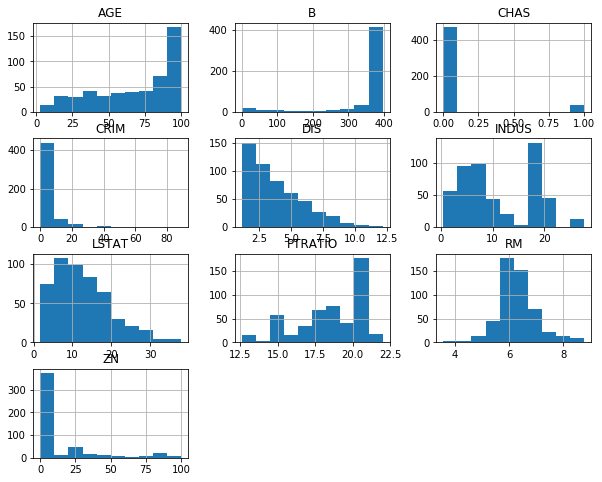

In [20]:
boston_features.iloc[:,:10].hist(figsize=[10,8]);

## Perform log transformations for the variables where it makes sense

Analyze the results in terms of how they improved the normality performance. What is the problem with the "ZN" variable?  

In [31]:
boston_log = boston_features.iloc[:,:10].applymap(lambda x: np.log(x))
boston_log.head()

/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


,CRIM,ZN,INDUS,CHAS,RM,AGE,DIS,PTRATIO,B,LSTAT
0,-5.064036,2.890372,0.837248,-inf,1.883275,4.177459,1.408545,2.727853,5.983684,1.605430
1,-3.600502,-inf,1.955860,-inf,1.859574,4.368181,1.602836,2.879198,5.983684,2.212660
2,-3.601235,-inf,1.955860,-inf,1.971996,4.112512,1.602836,2.879198,5.973377,1.393766
3,-3.430523,-inf,0.779325,-inf,1.945624,3.824284,1.802073,2.928524,5.977949,1.078410
4,-2.672924,-inf,0.779325,-inf,1.966693,3.992681,1.802073,2.928524,5.983684,1.673351


In [34]:
boston_log.drop(["ZN", "CHAS"], axis=1, inplace=True)

In [35]:
boston_log.head()

,CRIM,INDUS,RM,AGE,DIS,PTRATIO,B,LSTAT
0,-5.064036,0.837248,1.883275,4.177459,1.408545,2.727853,5.983684,1.605430
1,-3.600502,1.955860,1.859574,4.368181,1.602836,2.879198,5.983684,2.212660
2,-3.601235,1.955860,1.971996,4.112512,1.602836,2.879198,5.973377,1.393766
3,-3.430523,0.779325,1.945624,3.824284,1.802073,2.928524,5.977949,1.078410
4,-2.672924,0.779325,1.966693,3.992681,1.802073,2.928524,5.983684,1.673351


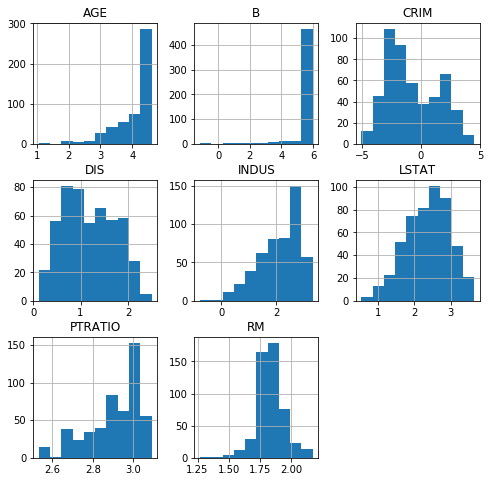

In [37]:
boston_log.hist(figsize=[8,8]);

"ZN" has a lot of zeros (more than 50%!). Remember that this variable denoted: "proportion of residential land zoned for lots over 25,000 sq.ft.". It might have made sense to categorize this variable to "over 25,000 feet or not (binary variable 1/0). Now you have a zero-inflated variable which is cumbersome to work with.

## Try different types of transformations on the continuous variables

Store your final features in a dataframe `features_final`

In [45]:
boston_log_minmax = pd.DataFrame([])

for column in boston_log:
    boston_log_minmax[column] = (boston_log[column] - min(boston_log[column])) / (max(boston_log[column]) - min(boston_log[column]))

boston_log_minmax.head()

,CRIM,INDUS,RM,AGE,DIS,PTRATIO,B,LSTAT
0,0.000000,0.393661,0.679532,0.879193,0.542096,0.348358,1.000000,0.342318
1,0.153211,0.666533,0.653269,0.933063,0.623954,0.619906,1.000000,0.538917
2,0.153134,0.666533,0.777845,0.860849,0.623954,0.619906,0.998553,0.273789
3,0.171005,0.379532,0.748622,0.779439,0.707895,0.708405,0.999195,0.171688
4,0.250315,0.379532,0.771968,0.827003,0.707895,0.708405,1.000000,0.364308


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a201b0358>,
      dtype=object)

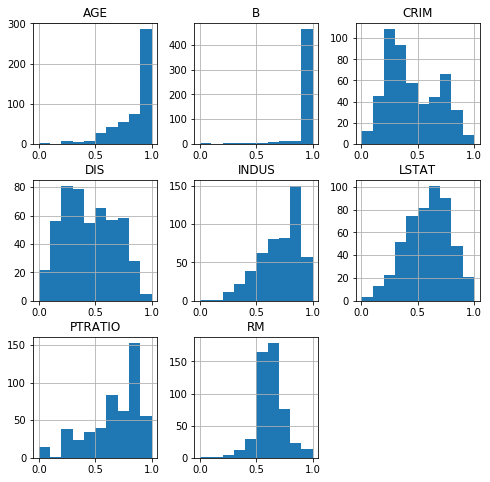

In [46]:
boston_log_minmax.hist(figsize=[8,8])

## Summary
Great! You've now transformed your final data using feature scaling and normalization, and stored them in the `features_final` dataframe.

In [47]:
features_final = boston_log_minmax

In [48]:
features_final.head()

,CRIM,INDUS,RM,AGE,DIS,PTRATIO,B,LSTAT
0,0.000000,0.393661,0.679532,0.879193,0.542096,0.348358,1.000000,0.342318
1,0.153211,0.666533,0.653269,0.933063,0.623954,0.619906,1.000000,0.538917
2,0.153134,0.666533,0.777845,0.860849,0.623954,0.619906,0.998553,0.273789
3,0.171005,0.379532,0.748622,0.779439,0.707895,0.708405,0.999195,0.171688
4,0.250315,0.379532,0.771968,0.827003,0.707895,0.708405,1.000000,0.364308
